# Voronoi diagrams
This notebook was translated from [ImageJ Macro](https://clij.github.io/clij2-docs/md/voronoi/).

It shows how to create a Voronoi diagram out of a binary image in the GPU.

## Initialize GPU

In [2]:
import pyclesperanto_prototype as cle

from skimage.io import imread, imsave, imshow
import matplotlib
import numpy as np

# initialize GPU
cle.select_device("GTX")
print("Used GPU: " + cle.get_device().name)

Used GPU: gfx902


## Get example data and push it to the GPU

c:\users\rober\miniconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


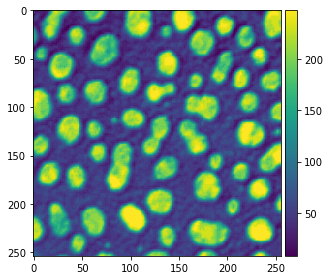

In [5]:
# load data
image = imread('https://samples.fiji.sc/blobs.png')

gpu_image = cle.push_zyx(image)

imshow(cle.pull_zyx(gpu_image))

In [ ]:
## Binarze image first

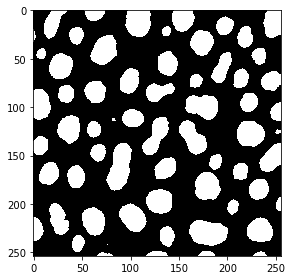

In [10]:
binary = cle.greater_constant(gpu_image, constant=128)

imshow(cle.pull_zyx(binary))

In [ ]:
## Label objects and fill gaps between them

c:\users\rober\miniconda3\lib\site-packages\pyopencl\__init__.py:253: CompilerWarning: Non-empty compiler output encountered. Set the environment variable PYOPENCL_COMPILER_OUTPUT=1 to see more.
  "to see more.", CompilerWarning)
c:\users\rober\miniconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


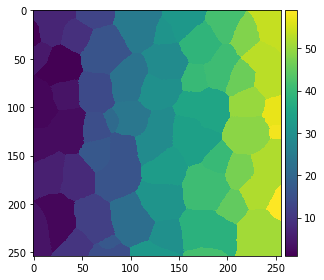

In [12]:
labels = cle.voronoi_labeling(binary)

imshow(cle.pull_zyx(labels))

## Make binary voronoi diagram

c:\users\rober\miniconda3\lib\site-packages\pyopencl\__init__.py:253: CompilerWarning: Non-empty compiler output encountered. Set the environment variable PYOPENCL_COMPILER_OUTPUT=1 to see more.
  "to see more.", CompilerWarning)


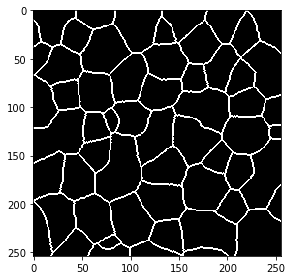

In [13]:
voronoi = cle.detect_label_edges(labels)

imshow(cle.pull_zyx(voronoi))